In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *

In [2]:
mu = 0.0
sigma = 0.2
num = 100_000

data = pd.DataFrame({'W' : np.random.normal(mu, sigma, num),
                     'y' : np.random.normal(mu+0.2, sigma, num),
                     'z' : np.random.normal(mu-0.5, 0.5, num),})

In [3]:
testHist = Hist1D(left=-2.0, right=2.0, bins=250, name='W $[GeV]$')

testHist.fill(data.W)
testHist.fill(data.z)


Hist1D(Regular(250, -2, 2), storage=Double()) # Sum: 199855.0 (200000.0 with flow)

In [4]:
testHist2 = Hist1D(left=-2.0, right=2.0, bins=250)
testHist2.fill(data.y)

Hist1D(Regular(250, -2, 2), storage=Double()) # Sum: 100000.0

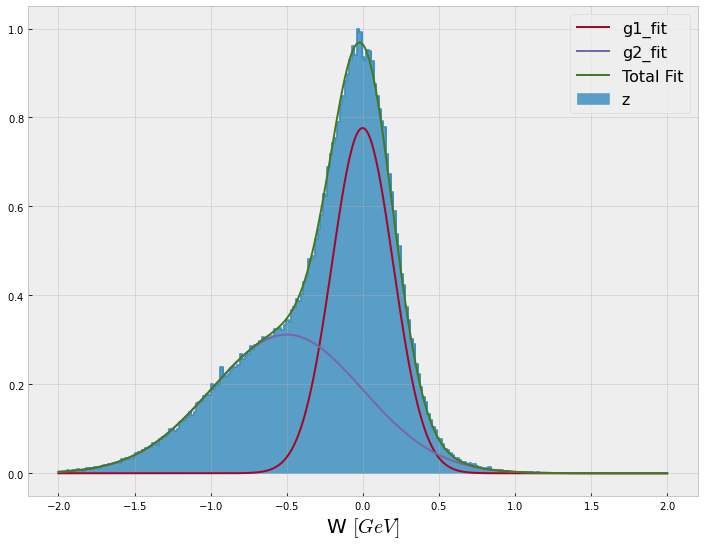

In [5]:
fig, ax = plt.subplots(figsize=(12,9))
testHist.histogram(ax, filled=True)


gauss1 = GaussianModel(prefix='g1_')
pars = gauss1.make_params()

pars['g1_center'].set(value=0.0)
pars['g1_sigma'].set(value=0.2)


gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-0.3)
pars['g2_sigma'].set(value=0.5)


mod = gauss1 + gauss2


testHist.customModel(mod, params=pars)

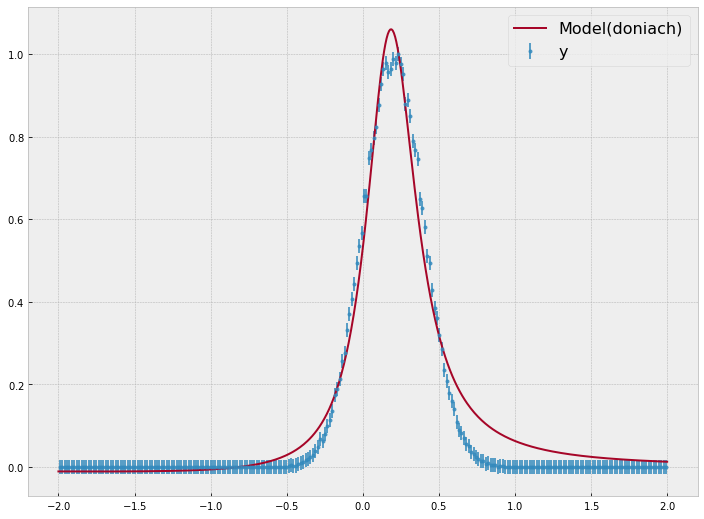

In [6]:
fig, ax = plt.subplots(figsize=(12,9))
testHist2.errorbar()
# testHist2.fitBreitWigner()
# testHist2.fitSplitLorentzian()
testHist2.fitDonaich()
# testHist2.fitSkewedVoigt()